In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
from folium.plugins import HeatMap

In [3]:
# Load your dataset
df = pd.read_csv('F:\DSGP_literature review\MyPart\encoded_data.csv')

# Sample 50,000 data points if needed
sampled_data = df.sample(n=50000, random_state=42)

In [4]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Day_of_Week_encoded,Junction_Detail_encoded,Weather_Conditions_encoded,Light_Conditions_encoded,LSOA_of_Accident_Location_encoded,Road_Type_encoded,Date,Time,Urban_or_Rural_Area,Number_of_Vehicles,Accident_Severity,Month
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,5,4,6,4,2830,3,2005-01-04,17:42,1,1.0,2,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,6,0,2,2,2890,0,2005-01-05,17:36,1,1.0,3,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,4,4,2,2,2838,3,2005-01-06,0:15,1,2.0,3,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,0,4,2,4,2821,3,2005-01-07,10:35,1,1.0,3,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,4,2,1,2844,3,2005-01-10,21:13,1,1.0,3,1


In [ ]:
##This code below is the final model.

In [ ]:
# Density-Based Clustering (DBSCAN)
X = df[['Latitude', 'Longitude']]
dbscan = DBSCAN(eps=0.1, min_samples=10)
df['Cluster'] = dbscan.fit_predict(X)

# Kernel Density Estimation (KDE)
kde_model = KernelDensity(bandwidth=0.01)
kde_model.fit(X)

# Generate a Grid for Density Estimation
grid_lat, grid_lon = np.mgrid[df['Latitude'].min():df['Latitude'].max():0.001, df['Longitude'].min():df['Longitude'].max():0.001]
grid_points = np.c_[grid_lat.ravel(), grid_lon.ravel()]

# Predict Density for Each Grid Point
densities = np.exp(kde_model.score_samples(grid_points))

# Create a Heatmap using Folium
heatmap_data = df[['Latitude', 'Longitude', 'Cluster']]
mymap = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Set threshold for high density(just a guesses t value)
threshold = 100

# Plot clusters
for cluster in df['Cluster'].unique():
    cluster_data = heatmap_data[heatmap_data['Cluster'] == cluster]

    # Set color to red to make high accident areas
    color = 'red' if len(cluster_data) > threshold else 'green'

    HeatMap(cluster_data, radius=10, blur=15, gradient={0.4: 'blue', 0.65: color, 1: color}).add_to(mymap)

    # Add a marker
    cluster_center = [cluster_data['Latitude'].mean(), cluster_data['Longitude'].mean()]
    folium.Marker(cluster_center, popup=f"Cluster: {cluster} Center", icon=folium.Icon(color=color)).add_to(mymap)

# map
mymap

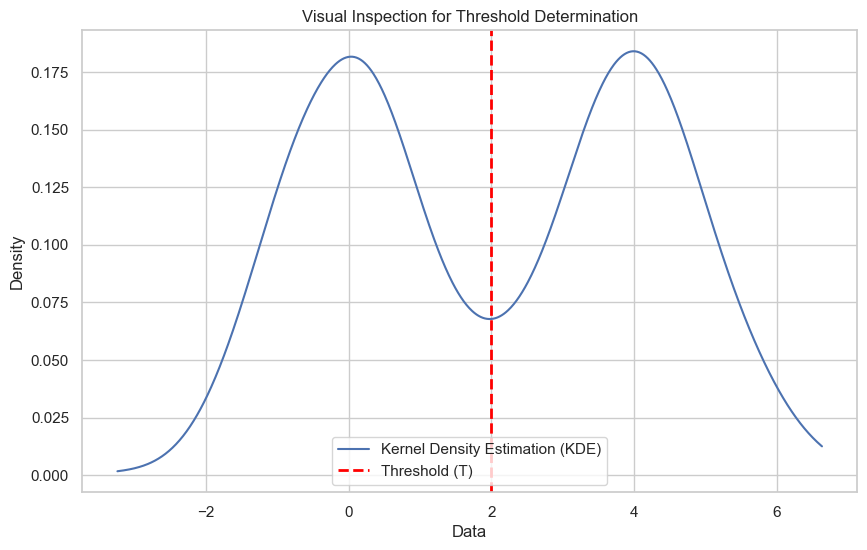

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate data (two normal distributions)
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(4, 1, 500)])

# Fit KDE model
kde_model = KernelDensity(bandwidth=0.5)
kde_model.fit(data.reshape(-1, 1))

# Generate grid 
x_plot = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
densities = np.exp(kde_model.score_samples(x_plot))

# Plot KDE
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_plot.flatten(), y=densities, label='Kernel Density Estimation (KDE)')

# Visual Inspection for kde
threshold = 2  #this is hyphthetical value
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold (T)')
plt.title('Visual Inspection for Threshold Determination')
plt.xlabel('Data')
plt.ylabel('Density')

plt.legend()
plt.show()

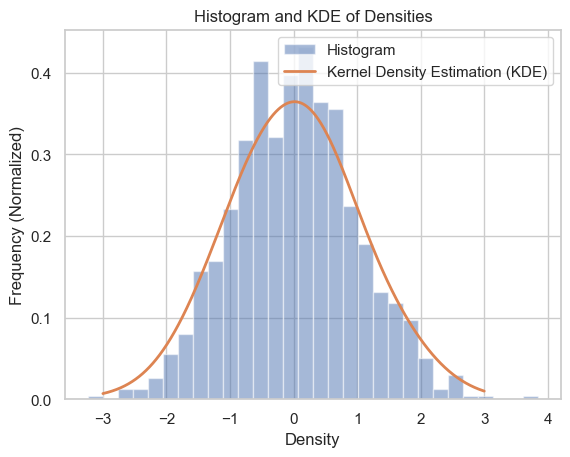

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Sample densities (hypothetical values)
np.random.seed(42)
sample_densities = np.random.normal(loc=0, scale=1, size=1000)

# Fit KDE model
kde_model = KernelDensity(bandwidth=0.5)
kde_model.fit(sample_densities.reshape(-1, 1))

# Generate grid 
x_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
densities = np.exp(kde_model.score_samples(x_plot))

# Plot histogram and KDE
plt.hist(sample_densities, bins=30, density=True, alpha=0.5, label='Histogram')
plt.plot(x_plot, densities, label='Kernel Density Estimation (KDE)', linewidth=2)
plt.xlabel('Density')
plt.ylabel('Frequency (Normalized)')
plt.title('Histogram and KDE of Densities')
plt.legend()
plt.show()

In [ ]:
#Density-Based Clustering (DBSCAN)
X = df[['Latitude', 'Longitude']]
dbscan = DBSCAN(eps=0.1, min_samples=10)
df['Cluster'] = dbscan.fit_predict(X)

# Kernel Density Estimation (KDE)
kde_model = KernelDensity(bandwidth=0.01)
kde_model.fit(X)

# Grid for Density Estimation
grid_lat, grid_lon = np.mgrid[df['Latitude'].min():df['Latitude'].max():0.001, df['Longitude'].min():df['Longitude'].max():0.001]
grid_points = np.c_[grid_lat.ravel(), grid_lon.ravel()]

# Predict Density for Each Grid Point
densities = np.exp(kde_model.score_samples(grid_points))

# Heatmap using Folium
heatmap_data = df[['Latitude', 'Longitude', 'Cluster']]
mymap = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Plot clusters 
for cluster in df['Cluster'].unique():
    cluster_data = heatmap_data[heatmap_data['Cluster'] == cluster]
    HeatMap(cluster_data, radius=10, blur=15).add_to(mymap)

    # Add a marker for centering the clusters
    cluster_center = [cluster_data['Latitude'].mean(), cluster_data['Longitude'].mean()]
    folium.Marker(cluster_center, popup=f"Cluster: {cluster} Center").add_to(mymap)

#  the map 
mymap